# TensorBoard入門

https://colab.research.google.com/github/academeia/machine-learning-seminar_2020/blob/master/tensorboard/fmnist_tensorboard.ipynb
<br>ここでは、TensorBoardをFashion-MNISTの分類問題に適用します。
まずは必要なライブラリをインポートします。

In [1]:
%load_ext tensorboard
import sys
#print(sys.path)
import tensorflow as tf
from tensorflow import keras
import datetime
import numpy as np
import matplotlib.pyplot as plt

/Users/ykonishi/github/machine-learning-seminar_2020/tensorboard


次に、Fashion_MNISTのデータをダウンロードします。\*\_labelsの整数値iがclass_namesリストのi番目に対応します。

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

次に画像データをmatplotlibプロットします。ここではtrain_imagesの最初の25個を並べて表示しています。

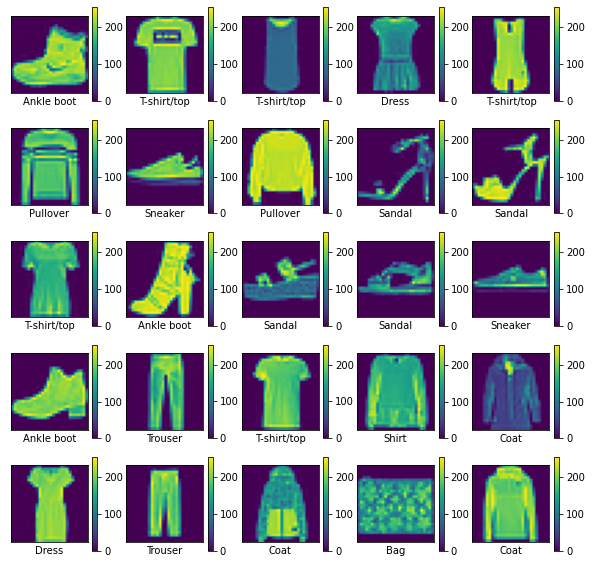

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.xlabel(class_names[train_labels[i]])
plt.show()

ここから分類器の学習を行います。画像イメージの各点の値を\[0, 1\]で規格化し、モデルを定義、コンパイルします。モデルは隠れ層が128, 10の2層のMLPで、1層目をReLU、2層目をsoftmaxでアクティベートしています。

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

学習を実行し、TensorBoardで使用するログを保存します。以下の部分に注意してください。

- ログディレクトリの指定
- TensorBoardのコールバックの指定

In [5]:
log_dir = "./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print(log_dir)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(train_images, train_labels, epochs=5, callbacks=[tensorboard_callback])

model.save('clf_fmnist.h5')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

%tensorboard --logdir logs/fit

./logs/fit/20200821-152738
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 92us/sample - loss: 0.5002 - accuracy: 0.8245s - loss: 0.5008 - accuracy: 0.82
Epoch 2/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3732 - accuracy: 0.8655
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3352 - accuracy: 0.8770
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3108 - accuracy: 0.8860
Epoch 5/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2930 - accuracy: 0.8918
10000/10000 - 0s - loss: 0.3580 - accuracy: 0.8692


ここまで、TensorBoardの基本的な使い方を見てきました。TensorBoardは上記で見たもの以外にも様々なデータを見る事が出来ます。以下では、画像データ（上でプロットしたもの）をTensorBoard上で見られるようにしています。

In [6]:
logdir = "logs/train_data/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

file_writer = tf.summary.create_file_writer(logdir)

with file_writer.as_default():
  # Don't forget to reshape.
  images = np.reshape(train_images[0:25], (-1, 28, 28, 1))
  tf.summary.image("25 training data examples", images, max_outputs=25, step=0)

%tensorboard --logdir logs/train_data